In [3]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:12<00:00, 153MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.5MB/s]


In [4]:
import zipfile

zipref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zipref.extractall('/content')
zipref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout
from keras import regularizers

In [6]:
train_data = keras.utils.image_dataset_from_directory(
    '/content/train',
    labels="inferred",
    batch_size=32,
    image_size=(224, 224)
)

validation_ds = keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    batch_size=32,
    image_size=(224, 224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_data = train_data.map(process)
validation_ds = validation_ds.map(process)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [11]:
history = model.fit(train_data, validation_data=validation_ds, epochs=5)

Epoch 1/5
625/625 [==============================] - 63s 87ms/step - loss: 1.3311 - accuracy: 0.5577 - val_loss: 0.9321 - val_accuracy: 0.6082
Epoch 2/5
625/625 [==============================] - 50s 80ms/step - loss: 0.8965 - accuracy: 0.6258 - val_loss: 0.9115 - val_accuracy: 0.6238
Epoch 3/5
625/625 [==============================] - 51s 81ms/step - loss: 0.7887 - accuracy: 0.6942 - val_loss: 0.7886 - val_accuracy: 0.7472
Epoch 4/5
625/625 [==============================] - 54s 86ms/step - loss: 0.6428 - accuracy: 0.7628 - val_loss: 0.5773 - val_accuracy: 0.8020
Epoch 5/5
625/625 [==============================] - 54s 86ms/step - loss: 0.5646 - accuracy: 0.7972 - val_loss: 1.0763 - val_accuracy: 0.6026


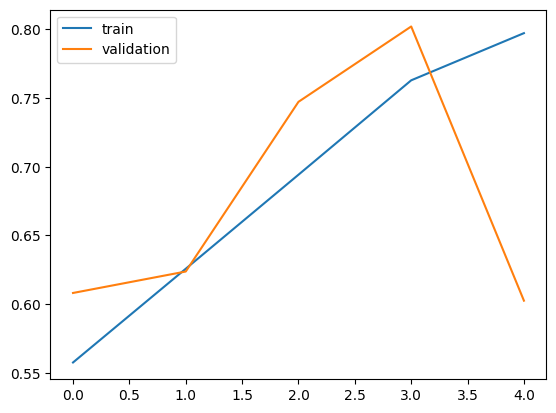

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(history.history["accuracy"], label="train")
sns.lineplot(history.history["val_accuracy"], label="validation")
plt.show()

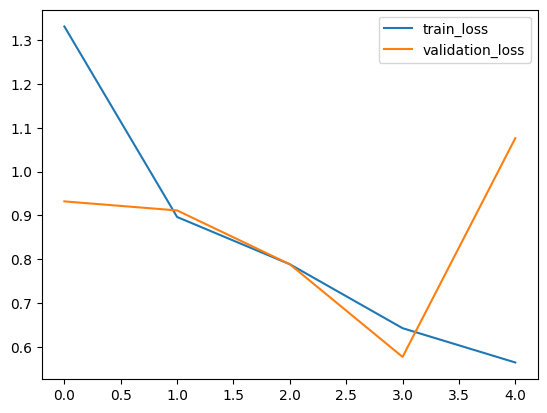

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(history.history["loss"], label="train_loss")
sns.lineplot(history.history["val_loss"], label="validation_loss")
plt.show()

In [14]:
from keras.applications.vgg16 import VGG16

In [15]:
vg = VGG16()

553467096/553467096 [==============================] - 7s 0us/step


In [16]:
vg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model1 = Sequential()

In [18]:
for layer in vg.layers[:-1]:
  model1.add(layer)

In [19]:
for layer in model1.layers:
  layer.trainable = False

In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [21]:
model1.add(Dense(1, activation="sigmoid"))

In [22]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [23]:
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [24]:
history = model1.fit(train_data, validation_data=validation_ds, epochs=5)

Epoch 1/5
625/625 [==============================] - 129s 194ms/step - loss: 0.3495 - accuracy: 0.8514 - val_loss: 0.2676 - val_accuracy: 0.8886
Epoch 2/5
625/625 [==============================] - 100s 159ms/step - loss: 0.2642 - accuracy: 0.8885 - val_loss: 0.2444 - val_accuracy: 0.9022
Epoch 3/5
625/625 [==============================] - 101s 161ms/step - loss: 0.2442 - accuracy: 0.8957 - val_loss: 0.2165 - val_accuracy: 0.9124
Epoch 4/5
625/625 [==============================] - 102s 162ms/step - loss: 0.2327 - accuracy: 0.9019 - val_loss: 0.2090 - val_accuracy: 0.9130
Epoch 5/5
625/625 [==============================] - 101s 161ms/step - loss: 0.2249 - accuracy: 0.9067 - val_loss: 0.2091 - val_accuracy: 0.9102


In [27]:
from tensorflow.keras.models import load_model, save_model

model.save('Model_CatVsDog_.h5')

In [26]:
from tensorflow.keras.models import load_model, save_model

model1.save('Model_CatVsDog_VGG16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
